In [7]:
#author: Antonin Grateau
#date: December 15, 2021

import numpy as np
from matplotlib import colors as matcolors, pyplot as plt
from math import *
from scipy.fft import fft, fftfreq, ifft, fftshift

In [8]:
#Paramètres physiques du problèmes

eps0 = 8.85e-12
epsr = 12.6
eps = eps0*epsr
e = 1.602e-19
mun = 0.4
mup = 0.015
en = 37
cp = 1.6e-14
cn = 4.1e-14
nt0 = 5e21
pt0 = 6e22
phip = (1/1.275)*1e-3
n0 = en*nt0/cn/pt0
I0 = 1e5
w = 1e-5
E0 = 1e6
n = 3.17
reff = 1.7e-12

#Définiton exponentielle complexe

def expc(x):
    return(cos(x)+1j*sin(x))

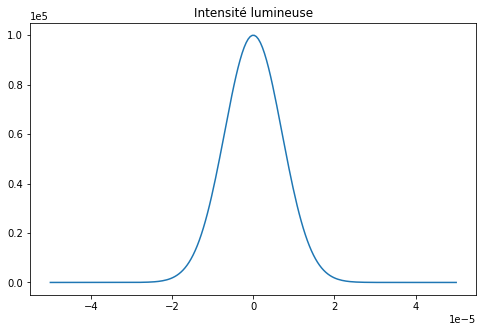

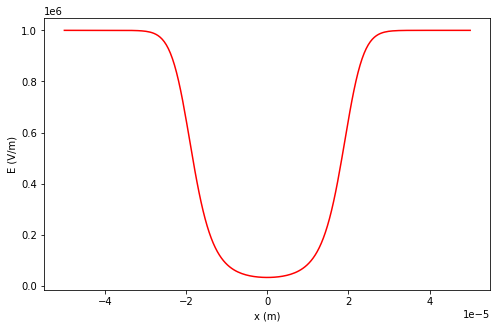

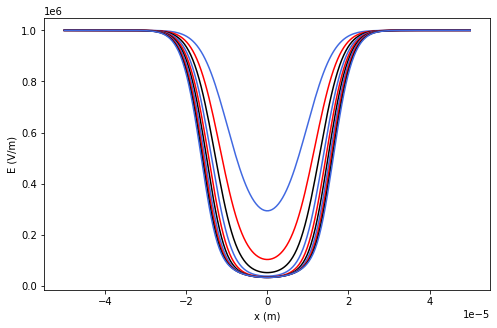

In [9]:
#Intensité
def I(x):
    return(I0*exp(-x**2/w**2))

#Champ de charge E
def E_charge(x,t):
    A = e/eps*mun*n0
    Q = e/eps*mup*phip*pt0/(cp*nt0)
    return(E0/(A+Q*I(x))*(A+Q*I(x)*exp(-(A+Q*I(x))*t)))

#Tracés
X = np.linspace(-5*w,5*w,200)
T = np.linspace(1e-6,100e-6,100)

plt.figure(figsize=(8,5))
plt.title('Intensité lumineuse')
plt.plot(X,[I(x) for x in X])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

A = e/eps*mun*n0
Q = e/eps*mup*phip*pt0/(cp*nt0)
plt.figure(figsize=(8,5))
plt.plot(X,[E0*A/(A+Q*I(x)) for x in X], color='red')
plt.xlabel('x (m)')
plt.ylabel('E (V/m)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.plot

plt.figure(figsize=(8,5))
for j in range(10):
    if j%3 == 0 :
        plt.plot(X,[E_charge(x,T[j]) for x in X], color='royalblue')
    if j%3 == 1 :
        plt.plot(X,[E_charge(x,T[j]) for x in X], color='red')
    if j%3 == 2 :
        plt.plot(X,[E_charge(x,T[j]) for x in X], color='black')
plt.xlabel('x (m)')
plt.ylabel('E (V/m)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

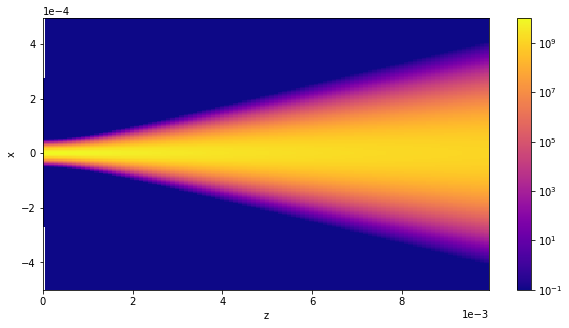

In [10]:
#Waist
w=1e-5

#Intensité
def I(x):
    return(10**10*exp(-x**2/w**2))

#Longueur et vecteur d'onde
lbd = 1064e-9
k = 2*pi/lbd

#Dimensions spatiales
lx = 1e-3
lz = 1e-2

#Calcul des pas et des fréquences spatiales
z_steps = 200
x_steps = 200
hx = lx/x_steps
hz = lz/z_steps
fx_step = 1/hx
Fx = fftshift(fftfreq(x_steps, hx))
Kx = [2*pi*fx for fx in Fx]

#Simulation
X = [-lx/2+i*hx for i in range(x_steps)]
I_value = [I(X[i]) for i in range(x_steps)]
A_z0 = [sqrt(value) for value in I_value]
data_champs = np.reshape(np.array([A_z0], dtype='complex'),(x_steps,1))
for j in range(z_steps-1):
    A = data_champs[:,j-1]
    Fx_A = fft(A)
    exp_D = [expc(-kx_value**2/(2*k)*hz) for kx_value in Kx]
    Fx_A_next = [fx_value*exp_D_value for fx_value,exp_D_value in zip(Fx_A,fftshift(exp_D))]
    A_next = ifft(Fx_A_next)
    data_champs = np.c_[data_champs, A_next]
data_intensite = abs(data_champs)**2


#Tracé
plt.figure(figsize=(10,5))
X = [-lx/2+i*hx for i in range(x_steps)]
Z = [i*hz for i in range(z_steps)]
z, x = np.meshgrid(Z, X)
plt.pcolor(z, x, data_intensite, cmap=plt.get_cmap("plasma"), norm=matcolors.LogNorm(vmin=0.1, vmax=1e10))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('z')
plt.ylabel('x')
plt.colorbar()
plt.show()

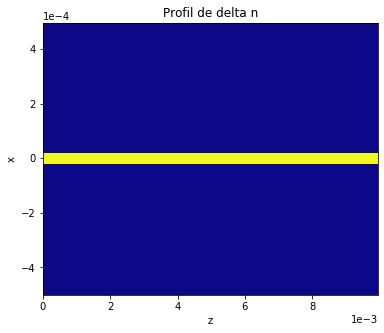

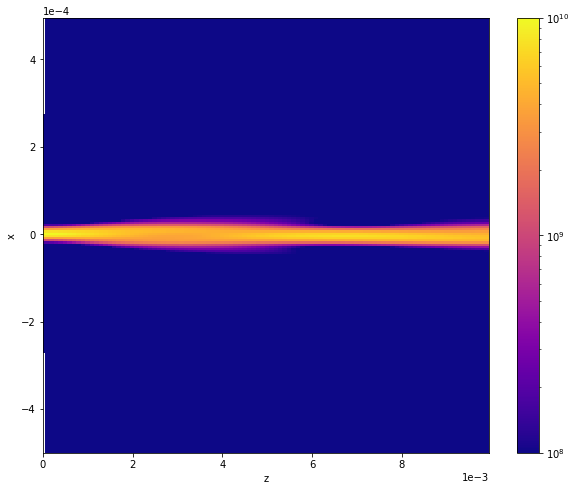

In [11]:
#Waist
w=1e-5

#Intensité
def I(x):
    return(10**10*exp(-x**2/w**2))

#Longueur et vecteur d'onde
lbd = 1064e-9
k = 2*pi/lbd

#Variation d'indice
delta_n = 1e-3

#Dimensions spatiales
lx = 1e-3
lz = 1e-2

#Calcul des pas et des fréquences spatiales
z_steps = 200
x_steps = 200
hx = lx/x_steps
hz = lz/z_steps
fx_step = 1/hx
Fx = fftshift(fftfreq(x_steps, hx))
Kx = [2*pi*fx for fx in Fx]

#Simulation
X = [-lx/2+i*hx for i in range(x_steps)]
I_value = [I(X[i]) for i in range(x_steps)]
A_z0 = [sqrt(value) for value in I_value]
data_champs = np.reshape(np.array([A_z0], dtype='complex'),(x_steps,1))
v_exp_S = expc(k/n*delta_n*hz)
m_exp_S = np.ones((x_steps,1), dtype='complex')
for i_boucle in range(x_steps//2 - int(2*w/hx), x_steps//2 + int(2*w/hx)):
    m_exp_S[i_boucle] = v_exp_S
for j in range(z_steps-1):
    A = data_champs[:,j-1]
    Fx_A = fft(A)
    exp_D = [expc(-kx_value**2/(2*k)*hz) for kx_value in Kx]
    Fx_A_next = [fx_value*exp_D_value for fx_value,exp_D_value in zip(Fx_A,fftshift(exp_D))]
    A_next_inter = ifft(Fx_A_next)
    A_next = [A_next_inter_value*m_exp_S_value for A_next_inter_value,m_exp_S_value in zip(A_next_inter,m_exp_S)]
    data_champs = np.c_[data_champs, A_next]
data_intensite = abs(data_champs)**2


#Tracés

#Profil d'indice
delta_N = np.zeros((x_steps, z_steps))
for i_boucle in range(x_steps//2 - int(2*w/hx), x_steps//2 + int(2*w/hx)):
    for j_boucle in range(z_steps):
        delta_N[i_boucle,j_boucle] = delta_n
X = [-lx/2+i*hx for i in range(x_steps)]
Z = [i*hz for i in range(z_steps)]
z, x = np.meshgrid(Z, X)
plt.figure(figsize=(6,5))
plt.title('Profil de delta n')
plt.xlabel('z')
plt.ylabel('x')
plt.pcolor(z, x, delta_N, cmap=plt.get_cmap("plasma"))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()


#
plt.figure(figsize=(10,8))
X = [-lx/2+i*hx for i in range(x_steps)]
Z = [i*hz for i in range(z_steps)]
z, x = np.meshgrid(Z, X)
plt.pcolor(z, x, data_intensite, cmap=plt.get_cmap("plasma"), norm=matcolors.LogNorm(vmin=1e8, vmax=1e10))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('z')
plt.ylabel('x')
plt.colorbar()
plt.show()

t =  1.9999999999999995e-06


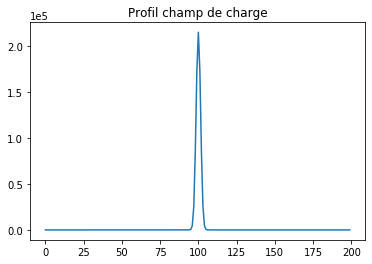

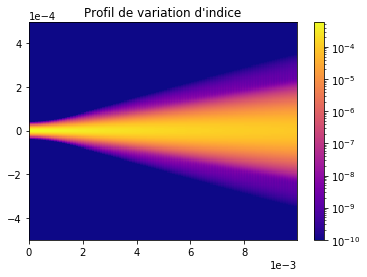

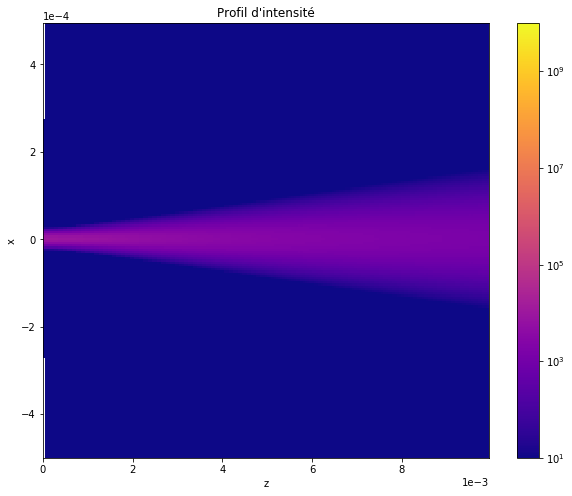

t =  2.9999999999999992e-06


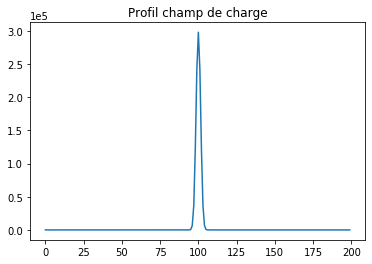

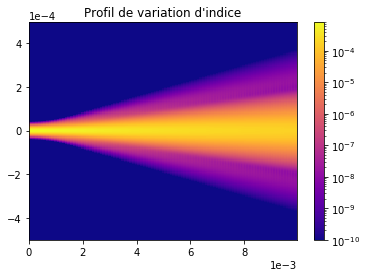

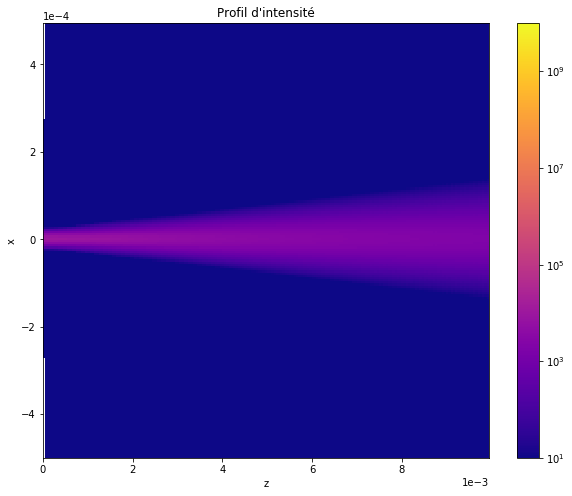

t =  3.999999999999999e-06


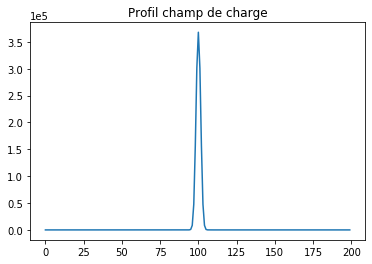

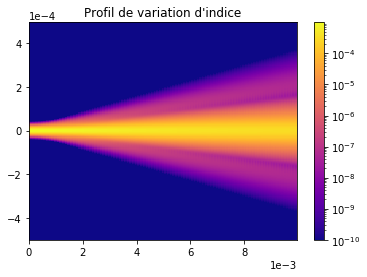

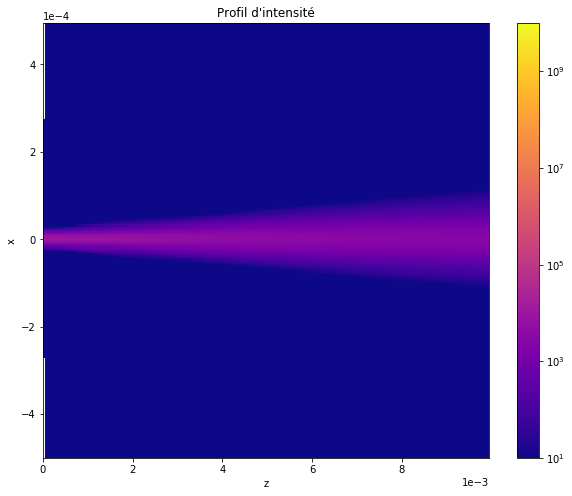

t =  4.999999999999999e-06


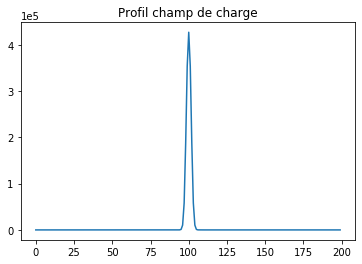

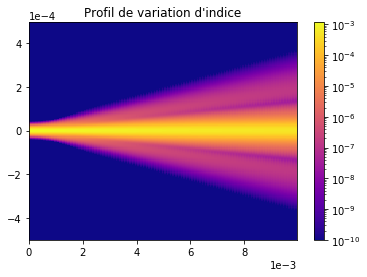

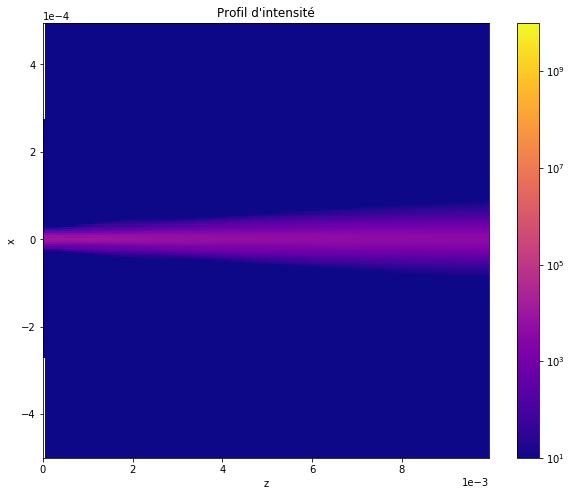

t =  5.9999999999999985e-06


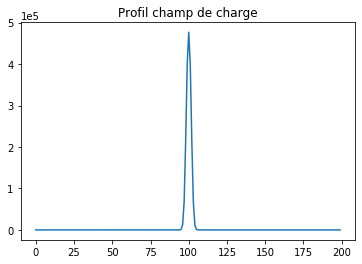

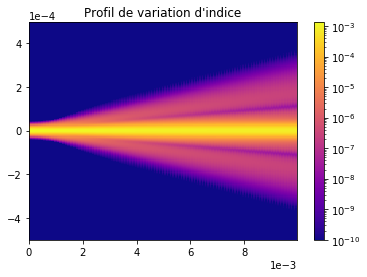

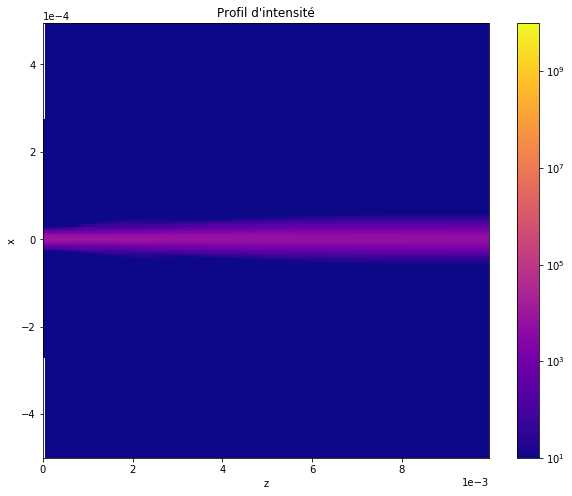

t =  6.999999999999998e-06


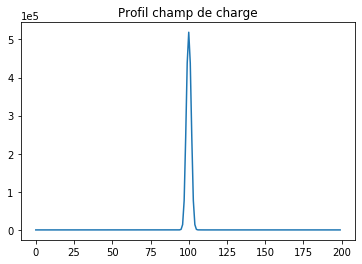

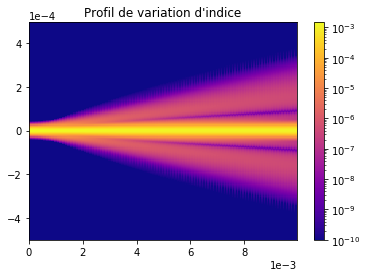

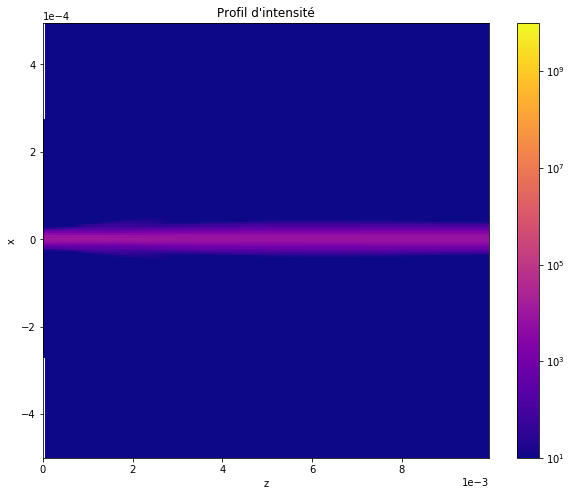

t =  7.999999999999998e-06


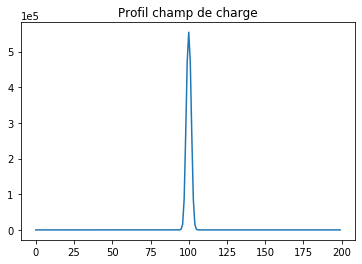

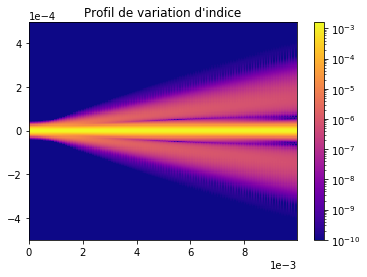

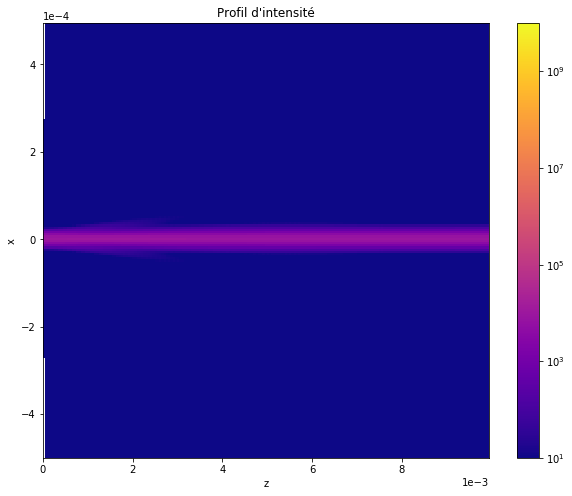

t =  8.999999999999999e-06


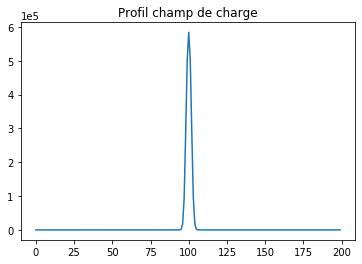

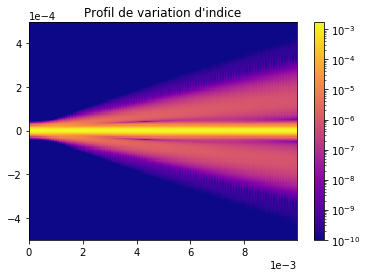

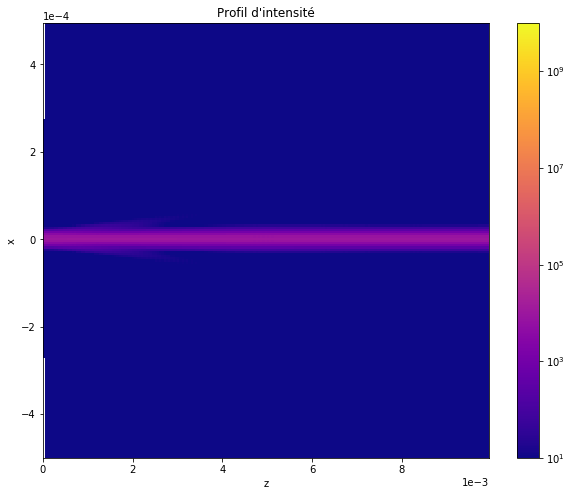

t =  9.999999999999999e-06


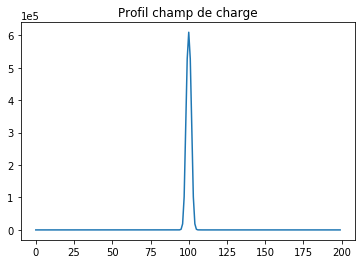

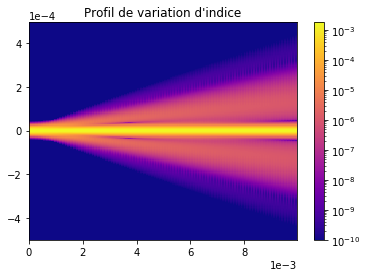

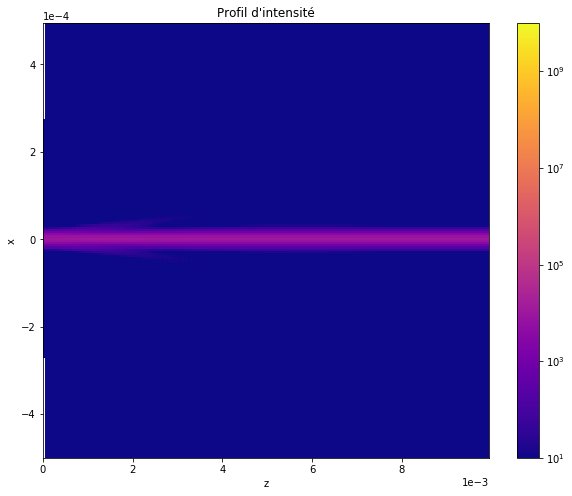

In [12]:
#Waist
w=1e-5
I0=1e4

#Intensité
def I(x):
    return(I0*exp(-x**2/w**2))

def E_charge2(I,t):
    A = e/eps*mun*n0
    Q = e/eps*mup*phip*pt0/(cp*nt0)
    return(E0/(A+Q*I)*(A+Q*I*exp(-(A+Q*I)*t)))
    

#Longueur et vecteur d'onde
lbd = 1064e-9
k = 2*pi/lbd

#Dimensions spatiales
lx = 1e-3
lz = 1e-2

#Calcul des pas et des fréquences spatiales
z_steps = 200
x_steps = 200
hx = lx/x_steps
hz = lz/z_steps
fx_step = 1/hx
Fx = fftshift(fftfreq(x_steps, hx))
Kx = [2*pi*fx for fx in Fx]

#Simulation
N_T = 100
X = [-lx/2+i*hx for i in range(x_steps)]
T = np.linspace(1e-6,10*1e-6,10)
I_value = [I(X[i]) for i in range(x_steps)]
m_delta_n = np.zeros((x_steps,z_steps))
for t_boucle in range(len(T)):
    A_z0 = [sqrt(value) for value in I_value]
    A_champ = np.reshape(np.array([A_z0], dtype='complex'),(x_steps,1))
    for j_boucle in range(z_steps-1):
        A_previous = A_champ[:,j_boucle-1]
        Fx_A = fft(A_previous)
        exp_D = [expc(-kx_value**2/(2*k)*hz) for kx_value in Kx]
        Fx_A_next = [fx_value*exp_D_value for fx_value,exp_D_value in zip(Fx_A,fftshift(exp_D))]
        A_next_inter = ifft(Fx_A_next)
        A_next = [A_next_inter_value*expc(k/n*delta_n_value*hz) for A_next_inter_value,delta_n_value in zip(A_next_inter,m_delta_n[:,j_boucle])]
        A_champ = np.c_[A_champ, A_next]
    #Calcul du champs de charge
    m_intensite = abs(A_champ)**2
    m_champ_charge = np.zeros((x_steps,z_steps))
    for i_boucle in range(x_steps):
        for j_boucle in range(z_steps):
            m_champ_charge[i_boucle,j_boucle] = abs(E_charge2(m_intensite[i_boucle,j_boucle],T[t_boucle])-E0)
    #Calcul de la nouvelle matrice delta N par effet Pockels
    for i_boucle in range(x_steps):
        for j_boucle in range(z_steps):
            m_delta_n[i_boucle,j_boucle] = max(1e-10,1/2*100*n**3*reff*m_champ_charge[i_boucle,j_boucle])
    if t_boucle>0: #Tracé toutes les 10 itérations
        print('t = ',T[t_boucle])
        
        #Profil du champ de charge
        plt.figure()
        plt.title('Profil champ de charge')
        plt.plot(m_champ_charge[:,0])
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        plt.show()
        
        #Profil d'indice
        plt.figure()
        plt.title("Profil de variation d'indice")
        plt.pcolor(z, x, m_delta_n, cmap=plt.get_cmap("plasma"), norm=matcolors.LogNorm())
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        plt.colorbar()
        plt.show()
        
        #Profil d'intensité
        plt.figure(figsize=(10,8))
        plt.title("Profil d'intensité")
        X = [-lx/2+i*hx for i in range(x_steps)]
        Z = [i*hz for i in range(z_steps)]
        z, x = np.meshgrid(Z, X)
        plt.pcolor(z, x, abs(A_champ)**2, cmap=plt.get_cmap("plasma"), norm=matcolors.LogNorm(vmin=1e1,vmax=1e10))
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        plt.xlabel('z')
        plt.ylabel('x')
        plt.colorbar()
        plt.show()